In [1]:
import pandas as pd
import numpy as np

# Reading the dataset

Manual inspections of monojet_Zp2000.0_DM_50.0_chan3.csv indicates a row can have at max 65 columns.
This means an event can contain an event in monojet_Zp2000.0_DM_50.0_chan3.csv can contain at max 10 objects.
To accomodate for the additional ';' delimiter at the end of line, we consider an additional column.

In [2]:
max_columns = 65
column_names = ['event ID', 'process ID', 'event weight', 'MET', 'METphi']
n_obj = int((max_columns - 5) / 5) 
for i in range(1, n_obj + 1): #Subtracting 5 because first few columns are meta-data.
    column_names.extend([f'obj{i}', f'E{i}', f'pt{i}', f'eta{i}', f'phi{i}'])
    
column_names.append('sentinel')

In [3]:
df = pd.read_csv('monojet_Zp2000.0_DM_50.0_chan3.csv', header=None, sep=',|;', 
                 names=column_names, engine='python')

In [4]:
df.drop('sentinel', axis=1, inplace=True)
df.head()

,event ID,process ID,event weight,MET,METphi,obj1,E1,pt1,eta1,phi1,...,obj11,E11,pt11,eta11,phi11,obj12,E12,pt12,eta12,phi12
0,354,monojet_Zp2000.0_DM_50.0,0.000024,832841.0,-1.22431,b,947383.0,824498.0,-0.523103,1.644210,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,354,monojet_Zp2000.0_DM_50.0,0.000024,732115.0,1.17245,j,1069460.0,751597.0,0.858186,-1.842170,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,354,monojet_Zp2000.0_DM_50.0,0.000024,1056280.0,-3.06744,j,676000.0,640429.0,0.330450,0.704554,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,354,monojet_Zp2000.0_DM_50.0,0.000024,631781.0,1.64181,j,936707.0,616229.0,0.973383,-1.565920,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,354,monojet_Zp2000.0_DM_50.0,0.000024,457316.0,-1.87536,j,640313.0,589524.0,0.390749,1.237340,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [5]:
# filter the dataframe to keep only jet particles and their values of E, pt, eta and phi
filtered_particles = list()

for _, row in df.iterrows():
    for i in range(1, n_obj + 1): #iterate over different objects in an event.
        if(row[f'obj{i}'] == 'j'):
            e = row[f'E{i}']
            pt = row[f'pt{i}']
            eta = row[f'eta{i}']
            phi = row[f'phi{i}']
            
            filtered_particles.append([e, pt, eta, phi])
            
data = pd.DataFrame(filtered_particles, columns=['E', 'pt', 'eta', 'phi'])
print(f'The number of entries in the training data: {len(data)}')
print(data.head())

The number of entries in the training data: 22661
          E        pt       eta      phi
0  258722.0  243675.0  0.328962  2.25014
1  520092.0  108590.0 -2.247300 -1.85679
2  383024.0   88405.6  2.145160 -1.95635
3   39507.6   35365.1  0.470460 -1.16445
4  225430.0   26878.2 -2.816080 -2.25938


# Splitting data into train and test

In [6]:
#Splitting the data into train and test splits
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

print('Training sample:')
print(train.head())

print('\n')

print('Testing sample:')
print(test.head())

print('\n')

print(f'The number of entries in the training data: {len(train)}')
print(f'The number of entries in the validation data: {len(test)}')

Training sample:
              E        pt      eta       phi
15143  235076.0   25662.7  2.90480  2.617090
22423  465836.0   23937.2 -3.66078 -3.116470
20300   90651.8   43351.6 -1.36049  1.688120
11831  212221.0   30923.7 -2.61316  1.056860
20776  366621.0  356013.0 -0.23484  0.939062


Testing sample:
              E        pt       eta       phi
10129  210473.0  132322.0  1.034460  1.492890
6374    90280.7   51583.3  1.153490  0.583315
21123  215060.0  162558.0 -0.754307 -0.872281
9179   738145.0  456570.0 -1.050910 -0.928472
16467  935707.0  202979.0  2.209050 -1.485090


The number of entries in the training data: 15862
The number of entries in the validation data: 6799


In [7]:
import os
save_dir = "plotOutput"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
save = True # Option to save figure

# Visualizing the data

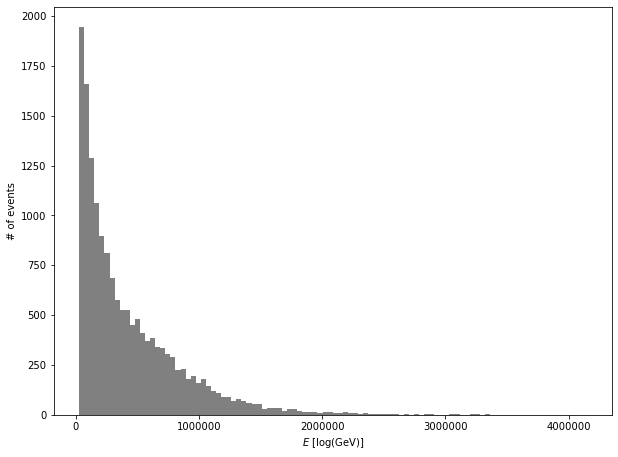

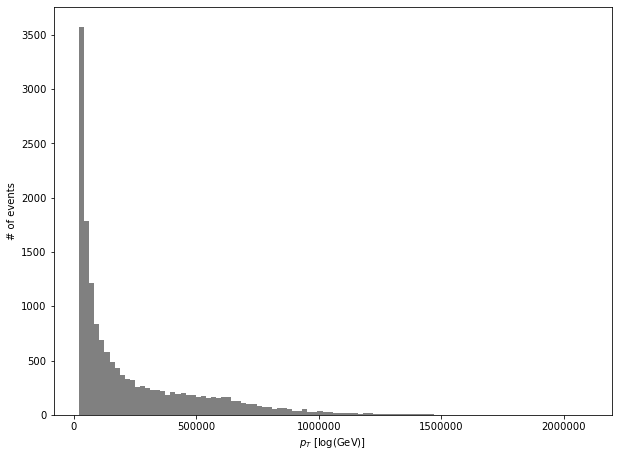

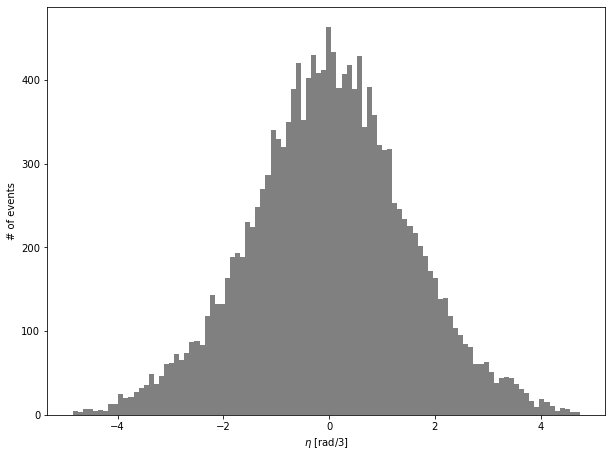

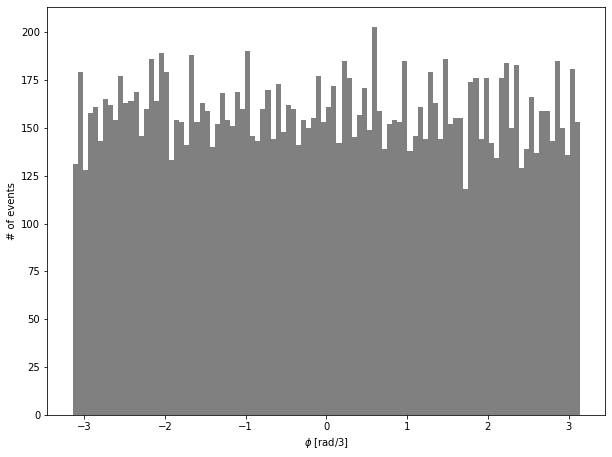

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

unit_list = ['[log(GeV)]', '[log(GeV)]', '[rad/3]', '[rad/3]']
variable_list = [r'$E$', r'$p_T$', r'$\eta$', r'$\phi$']

branches=["E", "pt","eta","phi"]

n_bins = 100

for kk in range(0,4):
    plt.figure(figsize=(10,7.5))
    n_hist_data, bin_edges, _ = plt.hist(train[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    if save:
        plt.savefig(os.path.join(save_dir,f'data_' + test.columns[kk] + '.png'))

# Scaling our data

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def apply_log(train_x, test_x, f_name):
    train_x[f_name] = train_x[f_name].apply(lambda x : np.log(1 + x))
    test_x[f_name] = test_x[f_name].apply(lambda x : np.log(1 + x))
    
    return train_x, test_x
    
def apply_scaler(train_x, test_x, f_name, scaler):
    scaler.fit(train_x[f_name].to_numpy().reshape(-1, 1))
    train_x[f_name] = scaler.transform(train_x[f_name].to_numpy().reshape(-1, 1))
    test_x[f_name] = scaler.transform(test_x[f_name].to_numpy().reshape(-1, 1))
    
    return train_x, test_x, scaler
    
def custom_scaler(train, test):
    #Since \eta follows a normal distribution, we can use standardScaler to scale it.
    #For E and pt we can use log(1 + x)
    # for \phi, we can use MinMaxScaling
    
    train_x = train.copy(deep=True)
    test_x = test.copy(deep=True)
    
    standard_scaler_eta = StandardScaler()
    min_max_scaler_e = MinMaxScaler()
    min_max_scaler_pt = MinMaxScaler()
    min_max_scaler_phi = MinMaxScaler()
    
    
    train_x, test_x = apply_log(train_x, test_x, 'E')
    train_x, test_x, min_max_scaler_e = apply_scaler(train_x, test_x, 'E', min_max_scaler_e)
    
    train_x, test_x = apply_log(train_x, test_x, 'pt')
    train_x, test_x, min_max_scaler_pt = apply_scaler(train_x, test_x, 'pt', min_max_scaler_pt)
    
    train_x, test_x, standard_scaler_eta = apply_scaler(train_x, test_x, 'eta', standard_scaler_eta)
    
    train_x, test_x, min_max_scaler_phi = apply_scaler(train_x, test_x, 'phi', min_max_scaler_phi)
    
    return train_x, test_x, min_max_scaler_e, min_max_scaler_pt, standard_scaler_eta, min_max_scaler_phi

In [10]:
def apply_inverse_scaler(data_x, f_name, scaler):
    data_x[f_name] = scaler.inverse_transform(data_x[f_name].to_numpy().reshape(-1, 1))
    
    return data_x 

def apply_exp(data_x, f_name):
    data_x[f_name] = data_x[f_name].apply(lambda x : np.exp(1 + x))
    
    return data_x

def denormalise_data(data, min_max_scaler_e, min_max_scaler_pt, standard_scaler_eta, min_max_scaler_phi):
    
    data_x = data.copy(deep=True)
    data_x = apply_inverse_scaler(data_x, 'E', min_max_scaler_e)
    data_x = apply_exp(data_x, 'E')
    
    data_x = apply_inverse_scaler(data_x, 'pt', min_max_scaler_pt)
    data_x = apply_exp(data_x, 'pt')
    
    data_x = apply_inverse_scaler(data_x, 'eta', standard_scaler_eta)
    
    data_x = apply_inverse_scaler(data_x, 'phi', min_max_scaler_phi)
    
    return data_x

In [11]:
# 1 for custom scaling, 2 for StandardScaler, 3 for MinMaxScaler
scaling_method = 1

if (scaling_method == 1):
    train_x, test_x, min_max_scaler_e, min_max_scaler_pt, standard_scaler_eta, min_max_scaler_phi \
        = custom_scaler(train, test)

else:
    if (scaling_method == 2):
        scaler = StandardScaler()
    elif(scaling_method == 3):
        scaler = MinMaxScaler()
    
    scaler.fit(train)

    train_x = pd.DataFrame(scaler.transform(train.to_numpy()), columns=train.columns)
    test_x = pd.DataFrame(scaler.transform(test.to_numpy()), columns=test.columns)

print('Normalised Training sample:')
print(train_x.head())

print('\n')

print('Normalised Testing sample:')
print(test_x.head())

print('\n')

Normalised Training sample:
              E        pt       eta       phi
15143  0.441278  0.030847  1.925597  0.916578
22423  0.574448  0.015517 -2.440158  0.003993
20300  0.255739  0.146322 -0.910590  0.768718
11831  0.421363  0.071919 -1.743547  0.668243
20776  0.527813  0.610079 -0.162093  0.649494


Normalised Testing sample:
              E        pt       eta       phi
10129  0.419752  0.392093  0.681922  0.737644
6374   0.254941  0.184612  0.761071  0.592871
21123  0.423950  0.437419 -0.507511  0.361191
9179   0.664077  0.664872 -0.704736  0.352247
16467  0.710255  0.486329  1.462961  0.263653




# Defining the network

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_y = train_x  # y = x since we are building an autoencoder
test_y = test_x

from fastai import learner
from fastai.data import core

# Constructs a tensor object of the data and wraps them in a TensorDataset object.
train_ds = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
valid_ds = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))

In [13]:
bs = 256

# Converts the TensorDataset into a DataLoader object and combines into one DataLoaders object (a basic wrapper
# around several DataLoader objects). 
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)
dls = core.DataLoaders(train_dl, valid_dl)

In [14]:
  class AE_3D_200_LeakyReLU(nn.Module):
    def __init__(self, n_features=4):
        super(AE_3D_200_LeakyReLU, self).__init__()
        self.en1 = nn.Linear(n_features, 200)
        self.en2 = nn.Linear(200, 200)
        self.en3 = nn.Linear(200, 20)
        self.en4 = nn.Linear(20, 3)
        
        self.de1 = nn.Linear(3, 20)
        self.de2 = nn.Linear(20, 200)
        self.de3 = nn.Linear(200, 200)
        self.de4 = nn.Linear(200, n_features)
        self.tanh = nn.Tanh()

    def encode(self, x):
        return self.en4(self.tanh(self.en3(self.tanh(self.en2(self.tanh(self.en1(x)))))))

    def decode(self, x):
        return self.de4(self.tanh(self.de3(self.tanh(self.de2(self.tanh(self.de1(self.tanh(x))))))))

    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

    def describe(self):
        return 'in-200-200-20-3-20-200-200-out'

model = AE_3D_200_LeakyReLU()
model.to('cpu')

AE_3D_200_LeakyReLU(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=200, bias=True)
  (en3): Linear(in_features=200, out_features=20, bias=True)
  (en4): Linear(in_features=20, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=20, bias=True)
  (de2): Linear(in_features=20, out_features=200, bias=True)
  (de3): Linear(in_features=200, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
)

In [15]:
from fastai.metrics import mse

loss_func = nn.MSELoss()

wd = 1e-6

recorder = learner.Recorder()
learn = learner.Learner(dls, model=model, wd=wd, loss_func=loss_func, cbs=recorder)

Learning rate with the minimum loss: 0.004786301031708717
Learning rate with the steepest gradient: 0.00363078061491251


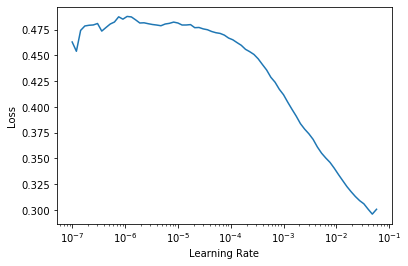

In [16]:
from fastai.callback import schedule

lr_min, lr_steep = learn.lr_find()

print('Learning rate with the minimum loss:', lr_min)
print('Learning rate with the steepest gradient:', lr_steep)

# Training the network

In [17]:
import time

start = time.perf_counter() # Starts timer
learn.fit_one_cycle(100, lr_min)
end = time.perf_counter() # Ends timer
delta_t = end - start
print('Training took', delta_t, 'seconds')

[0, 0.15528281033039093, 0.08954308182001114, '00:00']
[0, 0.15528281033039093, 0.08954308182001114, '00:00']
[1, 0.07022884488105774, 0.027806561440229416, '00:00']
[1, 0.07022884488105774, 0.027806561440229416, '00:00']
[2, 0.027016518637537956, 0.006466276943683624, '00:00']
[2, 0.027016518637537956, 0.006466276943683624, '00:00']
[3, 0.010908761061728, 0.004051610361784697, '00:00']
[3, 0.010908761061728, 0.004051610361784697, '00:00']
[4, 0.0056169964373111725, 0.0032129946630448103, '00:00']
[4, 0.0056169964373111725, 0.0032129946630448103, '00:00']
[5, 0.0037036030553281307, 0.002661945065483451, '00:00']
[5, 0.0037036030553281307, 0.002661945065483451, '00:00']
[6, 0.0021501416340470314, 0.0009308872395195067, '00:00']
[6, 0.0021501416340470314, 0.0009308872395195067, '00:00']
[7, 0.0010473045986145735, 0.00038533867336809635, '00:00']
[7, 0.0010473045986145735, 0.00038533867336809635, '00:00']
[8, 0.0007737316773273051, 0.0002414196787867695, '00:00']
[8, 0.0007737316773273051

[69, 2.522212525946088e-05, 1.4655550330644473e-05, '00:00']
[69, 2.522212525946088e-05, 1.4655550330644473e-05, '00:00']
[70, 2.7008485631085932e-05, 2.4017181203817017e-05, '00:00']
[70, 2.7008485631085932e-05, 2.4017181203817017e-05, '00:00']
[71, 2.1322352040442638e-05, 9.01619114301866e-06, '00:00']
[71, 2.1322352040442638e-05, 9.01619114301866e-06, '00:00']
[72, 1.9399765733396634e-05, 1.0650393960531801e-05, '00:00']
[72, 1.9399765733396634e-05, 1.0650393960531801e-05, '00:00']
[73, 1.4993795048212633e-05, 1.1427597200963646e-05, '00:00']
[73, 1.4993795048212633e-05, 1.1427597200963646e-05, '00:00']
[74, 1.580068055773154e-05, 2.5617848223191686e-05, '00:00']
[74, 1.580068055773154e-05, 2.5617848223191686e-05, '00:00']
[75, 1.421210436092224e-05, 6.082550953578902e-06, '00:00']
[75, 1.421210436092224e-05, 6.082550953578902e-06, '00:00']
[76, 8.774197340244427e-06, 7.0879377744859084e-06, '00:00']
[76, 8.774197340244427e-06, 7.0879377744859084e-06, '00:00']
[77, 9.71753615885973e

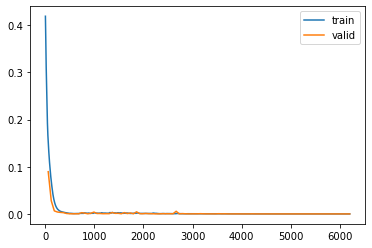

In [18]:
recorder.plot_loss()

In [19]:
learn.validate()

(#1) [2.2344438548316248e-06]

# Making the compression plots

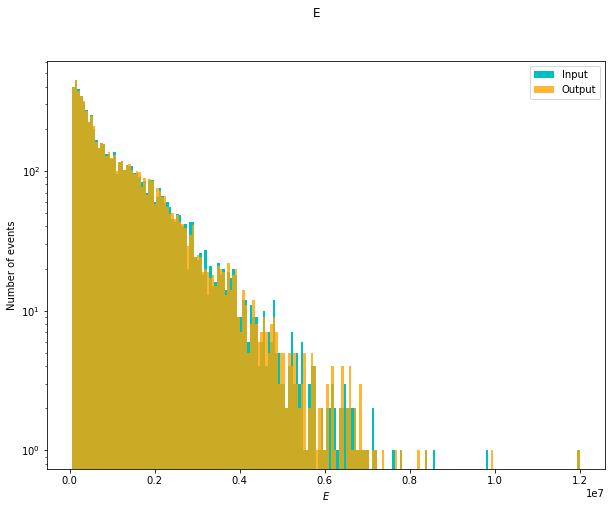

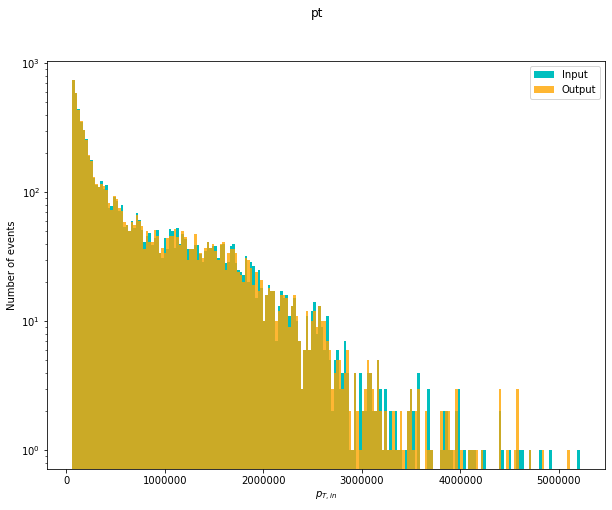

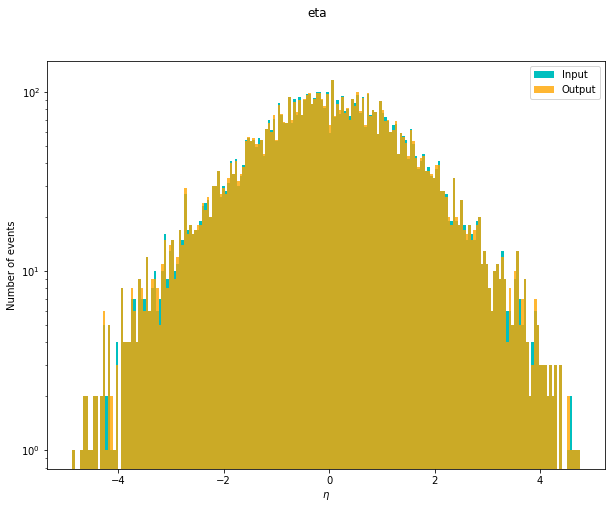

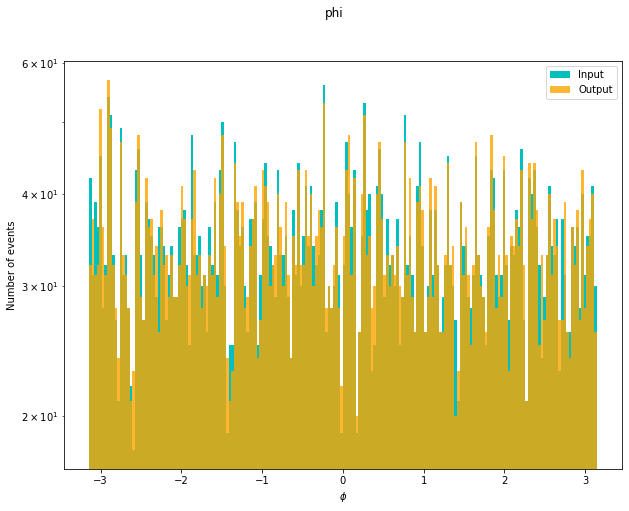

In [20]:
import numpy as np

plt.close('all')
variable_list = [r'$E$', r'$p_{T,in}$', r'$\eta$', r'$\phi$']

line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values, dtype=torch.float)
pred = model(data)
pred = pred.detach().numpy()
data = data.detach().numpy()

data_df = pd.DataFrame(data, columns=test.columns)
pred_df = pd.DataFrame(pred, columns=test.columns)

if (scaling_method == 1):
    unnormalized_data_df = denormalise_data(data_df, min_max_scaler_e, min_max_scaler_pt, standard_scaler_eta, min_max_scaler_phi)
    unnormalized_pred_df = denormalise_data(pred_df, min_max_scaler_e, min_max_scaler_pt, standard_scaler_eta, min_max_scaler_phi)
else:
    unnormalized_data_df = pd.DataFrame(scaler.inverse_transform(data), columns=data_df.columns)
    unnormalized_pred_df = pd.DataFrame(scaler.inverse_transform(pred), columns=pred_df.columns)
    
unnormalized_data = unnormalized_data_df.to_numpy()
unnormalized_pred = unnormalized_pred_df.to_numpy()
    
alph = 0.8
n_bins = 200
for kk in np.arange(4):
    plt.figure(figsize=(10,7.5))
    plt.ticklabel_format(axis="both", style="sci")
    n_hist_data, bin_edges, _ = plt.hist(unnormalized_data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(unnormalized_pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(test.columns[kk])
    plt.xlabel(xlabel=variable_list[kk])
    plt.ylabel('Number of events')
    plt.yscale('log')
    plt.legend()
    if save:
        plt.savefig(os.path.join(save_dir,'compression_' + test.columns[kk] + '_' + str(scaling_method) +'.png'))

# Making the residual plots

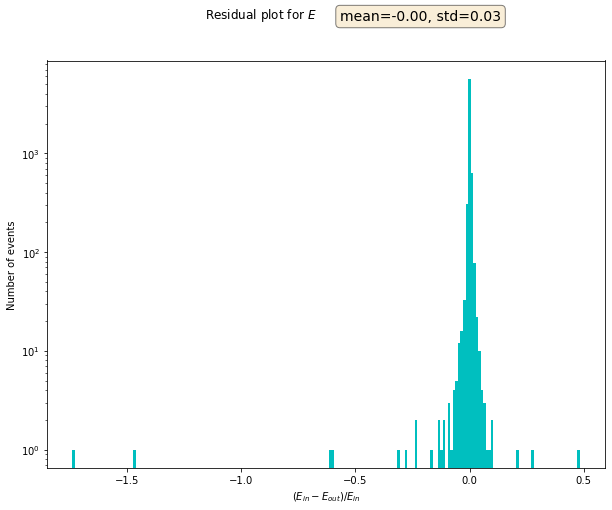

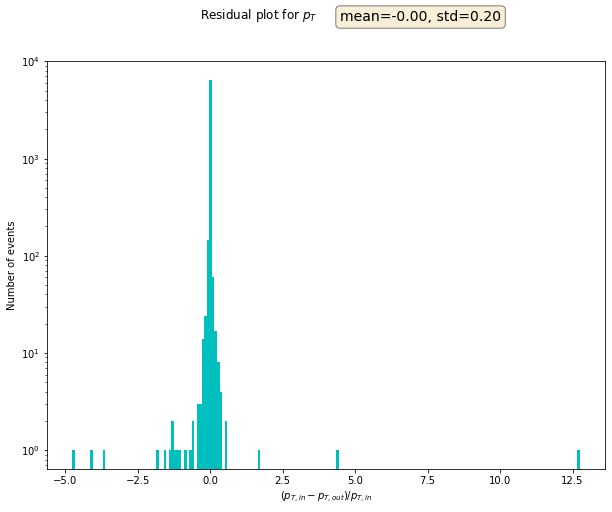

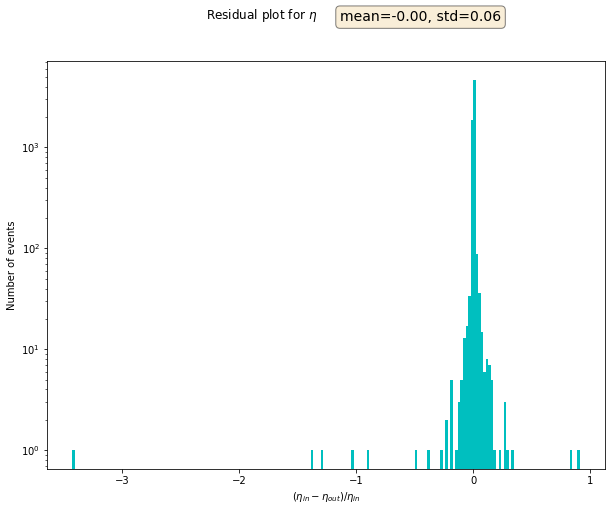

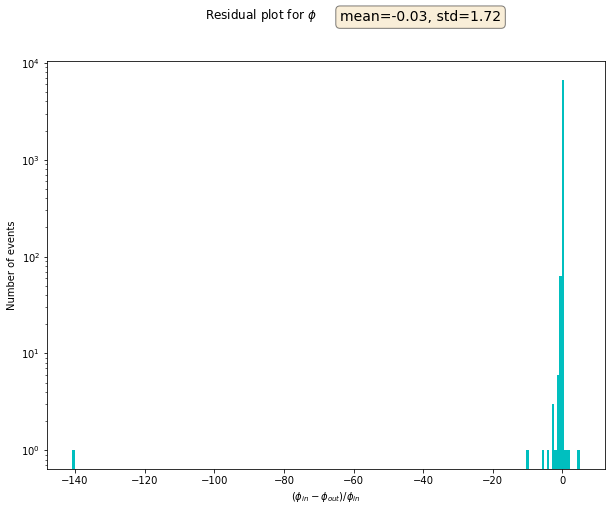

In [21]:
residual_df = (data_df - pred_df) / data_df
residual_data = residual_df.to_numpy()

variable_list = [r'$(E_{in} - E_{out})/E_{in}$', r'$(p_{T, in} - p_{T, out})/p_{T, in}$', 
                 r'$(\eta_{in} - \eta_{out})/\eta_{in}$', r'$(\phi_{in} - \phi_{out})/\phi_{in}$']
title_list = [r'$E$', r'$p_T$', r'$\eta$', r'$\phi$']

n_bins = 200
for kk in np.arange(4):
    inset_text_str = ', '.join((
        'mean=%.2f' % (np.mean(residual_data[:, kk]), ),
        'std=%.2f' % (np.std(residual_data[:, kk]), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    
    fig, ax = plt.subplots(figsize=(10, 7.5))
    plt.text(0.525, 1.125, inset_text_str, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    n_hist_data, bin_edges, _ = plt.hist(residual_data[:, kk], color=colors[1], bins=n_bins)
    plt.suptitle('Residual plot for ' + title_list[kk], horizontalalignment='right')
    plt.xlabel(xlabel=variable_list[kk])
    plt.ylabel('Number of events')
    plt.yscale('log')
    if save:
        plt.savefig(os.path.join(save_dir,'residual_' + residual_df.columns[kk] + '_' + str(scaling_method) + '.png'))